<h1 align="center">Prediction Modeling using Random Forests</h1>

<img src="RF_diagram.png" alt="numpy" width="900" style="float: center"/>

### Import Packages

In [1]:
import pandas as pd                  # Pandas
import numpy as np                   # Numpy
from matplotlib import pyplot as plt # Matplotlib

# Package to implement Random Forest
import sklearn
from sklearn.ensemble import RandomForestClassifier

# Package to implement Grid Search Cross Validation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold 

# Package for generating confusion matrix
from sklearn.metrics import plot_confusion_matrix

# Package for generating classification report
from sklearn.metrics import classification_report

# Package to record time
import time

# Package for Data pretty printer
from pprint import pprint

%matplotlib inline

Note:
- The `pprint` module provides a capability to “pretty-print” arbitrary Python data structures

### Import Data

In [2]:
# Import Data
ufc_df = pd.read_csv('ALL_weightclasses.csv')
ufc_df.head()

,Unnamed: 0,R_odds,B_odds,R_ev,B_ev,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,sig_str_dif,avg_sub_att_dif,avg_td_dif,better_rank,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds
0,0,-150.0,130,66.666667,130.000000,0,False,6,5,0,...,-0.53,0.6,-0.37,0,800.0,900.0,2000.0,1600.0,-110.0,175.0
1,1,170.0,-200,170.000000,50.000000,1,False,4,3,2,...,2.19,0.3,-1.48,2,450.0,350.0,700.0,1100.0,550.0,120.0
2,2,110.0,-130,110.000000,76.923077,1,False,5,3,1,...,-0.85,-1.6,-3.33,2,550.0,275.0,275.0,1400.0,600.0,185.0
3,3,-675.0,475,14.814815,475.000000,0,False,3,3,1,...,0.25,0.0,-1.57,2,175.0,900.0,500.0,3500.0,110.0,1100.0
4,4,-135.0,115,74.074074,115.000000,1,False,3,3,0,...,2.58,-0.6,-0.31,2,165.0,200.0,400.0,1200.0,900.0,600.0


In [3]:
#GET RID OF UNAMED COLUMN
ufc_df = ufc_df.drop(['Unnamed: 0',"longest_win_streak_dif",
"B_longest_win_streak",
"B_losses",
"win_streak_dif",
"B_win_by_KO/TKO",
"R_losses",
"sub_dif",
"R_win_by_KO/TKO",
"R_longest_win_streak",
"R_current_lose_streak",
"B_current_win_streak",
"R_win_by_Submission",
"R_win_by_Decision_Split",
"R_current_win_streak",
"B_win_by_Decision_Unanimous",
"B_win_by_Submission",
"total_title_bout_dif",
"R_Stance",
"B_current_lose_streak",
"R_total_title_bouts",
"lose_streak_dif",
"B_win_by_Decision_Split",
"B_Stance",
"better_rank",
"B_total_title_bouts",
"no_of_rounds",
"title_bout",
"B_draw",
"R_win_by_TKO_Doctor_Stoppage",
"B_win_by_TKO_Doctor_Stoppage",
"B_win_by_Decision_Majority",
"R_win_by_Decision_Majority",
"R_draw"], axis = 1)
ufc_df

,R_odds,B_odds,R_ev,B_ev,Winner,weight_class,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_landed,...,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds
0,-150.0,130,66.666667,130.000000,0,6,3.420000,0.590000,0.700000,0.240000,...,-8,-0.530000,0.600000,-0.370000,800.0,900.0,2000.0,1600.0,-110.0,175.0
1,170.0,-200,170.000000,50.000000,1,4,5.160000,0.420000,0.800000,0.790000,...,-1,2.190000,0.300000,-1.480000,450.0,350.0,700.0,1100.0,550.0,120.0
2,110.0,-130,110.000000,76.923077,1,5,2.920000,0.410000,0.100000,1.150000,...,-2,-0.850000,-1.600000,-3.330000,550.0,275.0,275.0,1400.0,600.0,185.0
3,-675.0,475,14.814815,475.000000,0,3,4.040000,0.340000,0.000000,0.000000,...,3,0.250000,0.000000,-1.570000,175.0,900.0,500.0,3500.0,110.0,1100.0
4,-135.0,115,74.074074,115.000000,1,3,5.220000,0.560000,0.000000,2.540000,...,5,2.580000,-0.600000,-0.310000,165.0,200.0,400.0,1200.0,900.0,600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3089,130.0,-140,130.000000,71.428571,0,6,83.500000,0.630000,2.000000,1.000000,...,1,63.333333,1.833333,0.166667,378.0,411.0,600.0,1640.0,450.0,150.0
3090,150.0,-160,150.000000,62.500000,0,3,24.000000,0.327500,2.250000,1.583333,...,-1,-20.733333,1.050000,0.650000,309.0,135.0,475.0,485.0,1330.0,632.0
3091,123.0,-133,123.000000,75.187970,1,4,28.000000,0.635000,0.625000,2.750000,...,6,9.150000,0.275000,0.950000,240.0,200.0,1275.0,1615.0,575.0,265.0
3092,-210.0,190,47.619048,190.000000,1,5,26.416667,0.416667,0.416667,0.333333,...,4,12.527778,-1.027778,-1.111111,325.0,665.0,105.0,940.0,1195.0,460.0


### Prepare Data

In [4]:
# Selecting data correponding to Input Features X and Outcome y
X = ufc_df.drop(columns=['Winner'])
y = ufc_df['Winner']


# Data Partitioning into train and test sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=1)

## Hyperparameters of Random Forest

### `n_estimators`: 
- The number of decision trees in the forest. 
- Default = 100
- Input options → integer

### `max_depth`:
- The maximum depth of the tree.
- Default = None
- Input options → integer

### `min_samples_split`:
- The minimum samples required to split an internal node. 
- Default = 2
- Input options → integer

### `min_samples_leaf`:
- The minimum samples required to be at a leaf node. 
- Default = 1
- Input options → integer

### `max_features`:
- The number of features to consider when looking for the best split.
- Default = None (max_features = n_features)
- Input options → integer or {“auto”, “sqrt”, “log2”}

## Hyperparameter Tuning

In [5]:
# Define your model
classifier = RandomForestClassifier(random_state = 42)

In [6]:
# Start with an initial guess for parameters
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 500, num = 10)]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 20, num = 10)]

# Minimum number of samples required to split a node
min_samples_split = [5, 10, 20]

# Minimum number of samples required at each leaf node
min_samples_leaf = [5, 10, 20]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

pprint(random_grid)

{'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
 'min_samples_leaf': [5, 10, 20],
 'min_samples_split': [5, 10, 20],
 'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]}


In [7]:
# Creating folds
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

In [8]:
# Call RandomizedSearchCV()
model_cv = RandomizedSearchCV(estimator = classifier, 
                              param_distributions = random_grid,
                              n_iter = 100,
                              scoring = 'f1_macro', 
                              cv = folds, 
                              verbose = 2,
                              random_state = 42,
                              n_jobs = -1) # Will utilize all available CPUs 

In [9]:
# Fit the model
start = time.time()            # Start Time
model_cv.fit(train_X, train_y)  
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Training time: 76.50724077224731s


In [10]:
print('Initial score: ', model_cv.best_score_)
print('Initial parameters: ', model_cv.best_params_)

Initial score:  0.6184860508527261
Initial parameters:  {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_depth': 10}


In [15]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [8, 10, 12],
    'min_samples_leaf': [3, 4, 5, 6],
    'min_samples_split': [4, 7, 10, 12],
    'n_estimators': [40, 50, 60]
}

pprint(param_grid)

{'max_depth': [8, 10, 12],
 'min_samples_leaf': [3, 4, 5, 6],
 'min_samples_split': [4, 7, 10, 12],
 'n_estimators': [40, 50, 60]}


In [16]:
# Call GridSearchCV()
model_cv = GridSearchCV(estimator = classifier, 
                        param_grid = param_grid, 
                        scoring= 'f1_macro', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs = -1) # Will utilize all available CPUs 

In [17]:
# Fit the model
start = time.time()            # Start Time
model_cv.fit(train_X, train_y)  
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Training time: 23.588067531585693s


In [18]:
print('Improved score: ', model_cv.best_score_)
print('Improved parameters: ', model_cv.best_params_)

Improved score:  0.6184860508527261
Improved parameters:  {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 4, 'n_estimators': 50}


## Save your prediction model and load it later to make predictions

### Using Pickle


In [19]:
# Package to import pickle
import pickle

In [20]:
# Save the model to your local machine
filename = 'allweightclassesFILTERED_randomforest_pickle.sav'
pickle.dump(model_cv, open(filename, 'wb'))

In [21]:
# At a later time.....
# Load the model from your local machine
filename = 'allweightclassesFILTERED_randomforest_pickle.sav'
loaded_model = pickle.load(open(filename, 'rb'))

**Making predictions on test set**

In [22]:
# Predictions on test set
y_pred = loaded_model.predict(test_X)

# Generating Classification Report
print("Classification Report - \n", 
      classification_report(test_y, y_pred))

Classification Report - 
               precision    recall  f1-score   support

           0       0.65      0.75      0.69       526
           1       0.59      0.47      0.52       403

    accuracy                           0.63       929
   macro avg       0.62      0.61      0.61       929
weighted avg       0.62      0.63      0.62       929



**Generating Confusion Matrix**

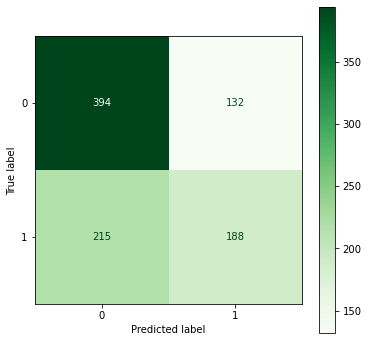

In [23]:
# Specifying figure size
fig, ax = plt.subplots(figsize=(6, 6)) 

# Generating confusion matrix
plot_confusion_matrix(loaded_model, test_X, test_y,
                      cmap = plt.cm.Greens,
                      values_format = '',
                      ax = ax);

**Estimating Prediction Probabilites**

In [24]:
# Getting prediction probabilites
prob = loaded_model.predict_proba(test_X)

# Printing prediction results
result = pd.DataFrame({'Actual': test_y, 'Predicted': y_pred})

# Creating columns for rejection and acceptance prob.
result[['Reject Prob.','Accept Prob.']] = pd.DataFrame(prob.tolist(), index = result.index)

# Saving dataframe as a csv file
#result.to_csv('Prediction Results.csv', index = False)

**Feature Importance**

In [25]:
# Storing importance values from the best fit model
importance = loaded_model.best_estimator_.feature_importances_

In [26]:
# Displaying feature importance as a dataframe
feature_imp = pd.DataFrame(list(zip(train_X.columns, importance)),
               columns = ['Feature', 'Importance'])

feature_imp = feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)

print(feature_imp.tail(30))

                        Feature  Importance
14            R_avg_SIG_STR_pct    0.023670
15                    r_ko_odds    0.023238
16                        B_age    0.021926
17                 R_avg_TD_pct    0.021222
18              B_avg_TD_landed    0.020631
19              avg_sub_att_dif    0.019009
20              total_round_dif    0.018850
21                R_avg_SUB_ATT    0.018555
22              R_avg_TD_landed    0.018554
23                        R_age    0.018455
24                      age_dif    0.018355
25                 B_avg_TD_pct    0.018093
26        B_total_rounds_fought    0.017862
27        R_total_rounds_fought    0.017661
28                     loss_dif    0.015449
29                  R_Reach_cms    0.015298
30                 R_Height_cms    0.014838
31                  B_Reach_cms    0.014224
32                      win_dif    0.013810
33                B_avg_SUB_ATT    0.012860
34                       R_wins    0.012350
35                   height_dif 

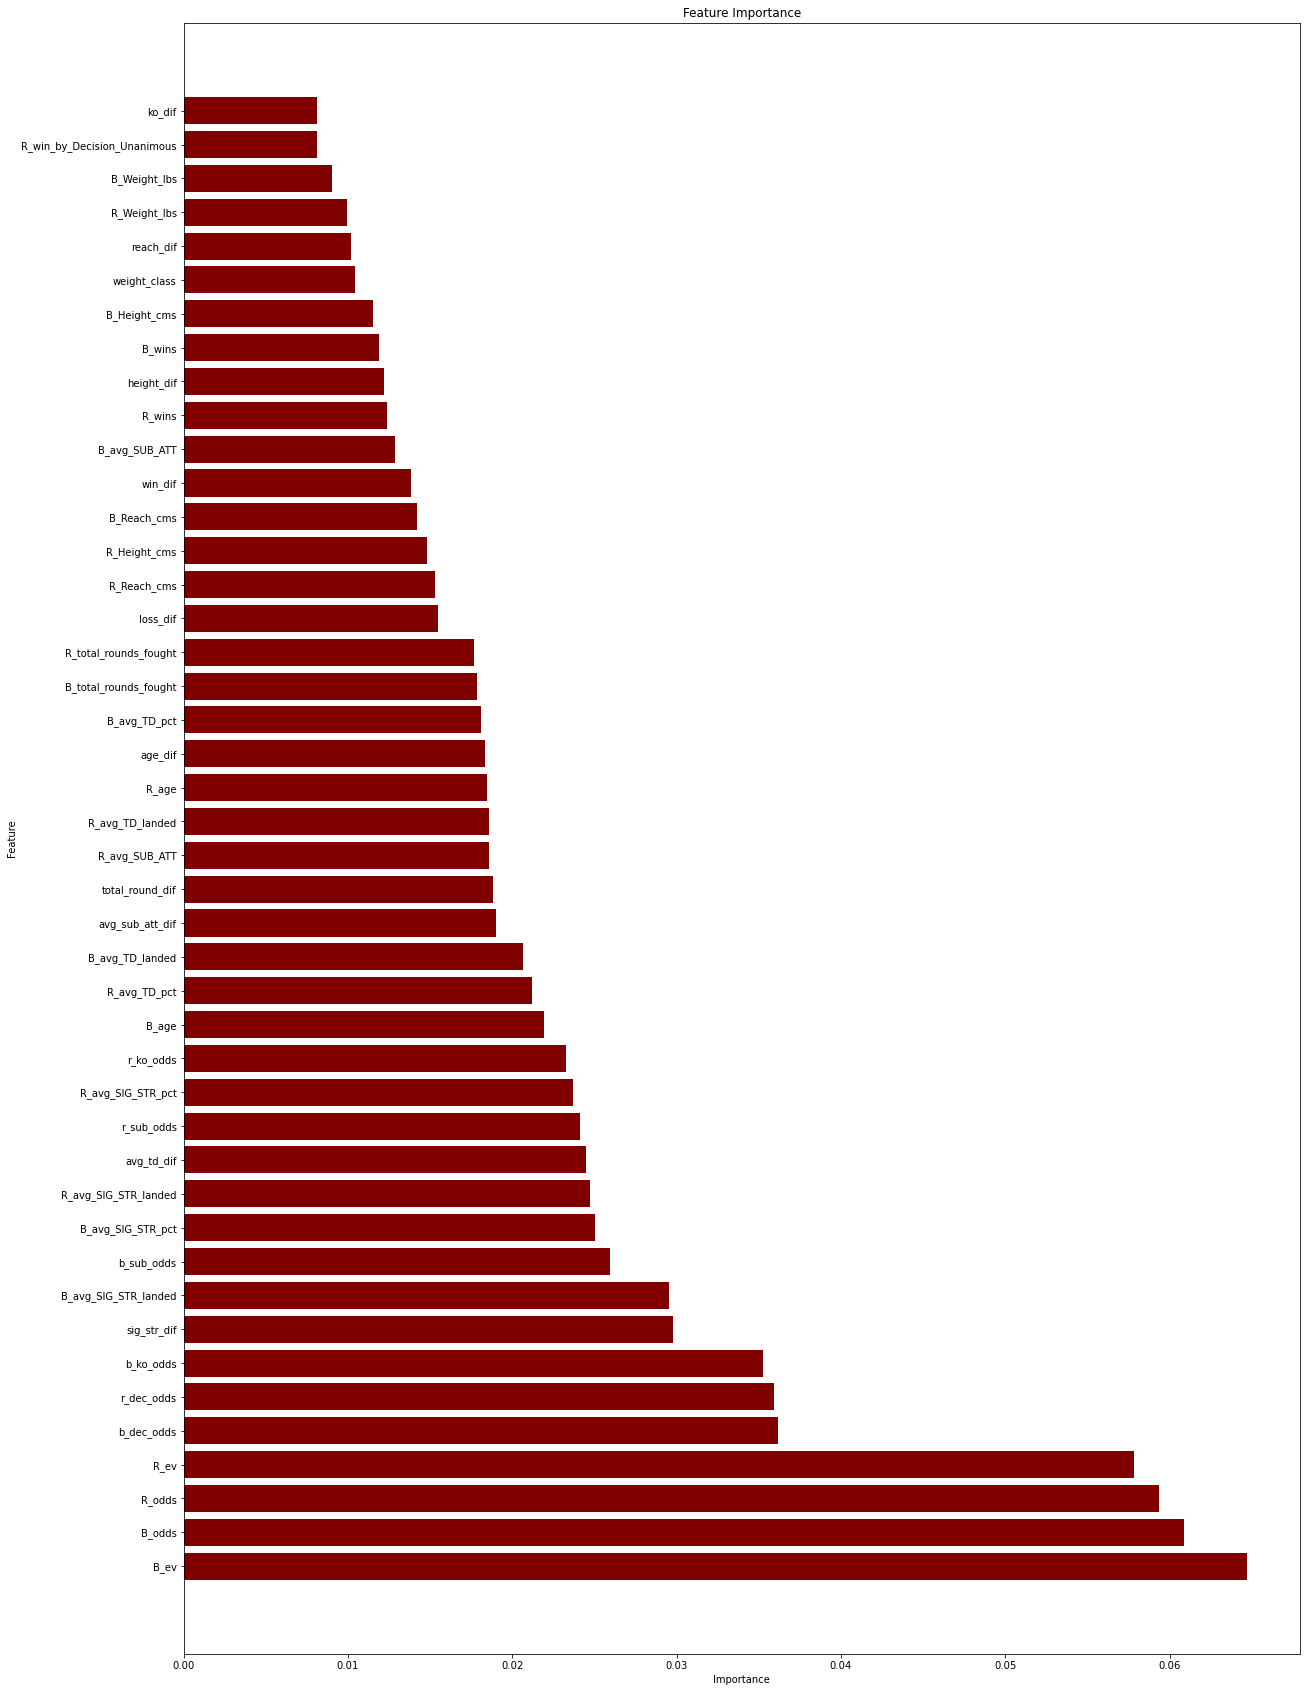

In [27]:
# Bar plot 
plt.figure(figsize=(20, 30))
plt.barh(feature_imp['Feature'], feature_imp['Importance'], color ='maroon')

plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");
plt.savefig('AllWeightclassesFILTERED_randomforest_plot.png')